In [1]:
print("Python Project EDA")

Python Project EDA


Exploratory Data Analysis(EDA) for a Sentiment Analysis on Customer Feedback Project

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

Load Data

In [3]:
feedback=pd.read_csv("customer_feedback_data.csv")
Meta=pd.read_csv("customer_metadata_data.csv")
Info=pd.read_csv("product_information_data.csv")


View data and Preprocessing the data

using info method check null values and using duplicate mehtod check duplicates values

In [4]:
print(feedback.head())
print(feedback.info())
print(feedback.describe())
print(feedback.duplicated())

  Feedback_ID Customer_ID Product_ID Feedback_Type Feedback_Date  Rating  \
0   F00000001   C00041906  P00000406         Email    2024-04-18       1   
1   F00000002   C00007297  P00000808        Survey    2024-01-04       2   
2   F00000003   C00001640  P00000966         Email    2024-04-26       3   
3   F00000004   C00048599  P00000947         Email    2024-01-23       2   
4   F00000005   C00018025  P00000659        Survey    2024-06-16       2   

                                             Comment Sentiment_Label  
0  Identify recently town trade federal relations...         Neutral  
1  Term paper different expect old speech of patt...         Neutral  
2  Smile use place cut outside medical stop ident...         Neutral  
3  Determine ground point staff speech degree tra...        Negative  
4  Past realize seat week war record during peace...        Negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Col

 Merge datasets on relevant column

In [5]:
Data1=Meta.merge(feedback, on="Customer_ID")
Data2=Info.merge(feedback,on="Product_ID")

Sentiment Distribution Analysis

In [6]:
df=Data2.filter(items=["Product_Name","Feedback_Type","Sentiment_Label","Price"])
df

,Product_Name,Feedback_Type,Sentiment_Label,Price
0,Those,Email,Neutral,357.11
1,Those,Email,Positive,357.11
2,Those,Social Media,Neutral,357.11
3,Those,Email,Neutral,357.11
4,Those,Email,Negative,357.11
...,...,...,...,...
99995,Anyone,Survey,Positive,874.98
99996,Anyone,Email,Neutral,874.98
99997,Anyone,Social Media,Neutral,874.98
99998,Anyone,Social Media,Positive,874.98


In [7]:
sentiment=df["Sentiment_Label"]
percentage=100

In [8]:
feedback_type_sentiment = df['Sentiment_Label'].value_counts(normalize=True)*100
product_sentiment = df.groupby('Product_Name')['Sentiment_Label'].value_counts(normalize=True) * 100

C:\Users\INTEL\AppData\Local\Temp\ipykernel_17496\3220059775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment, y=percentage, palette=['blue','red','green'])


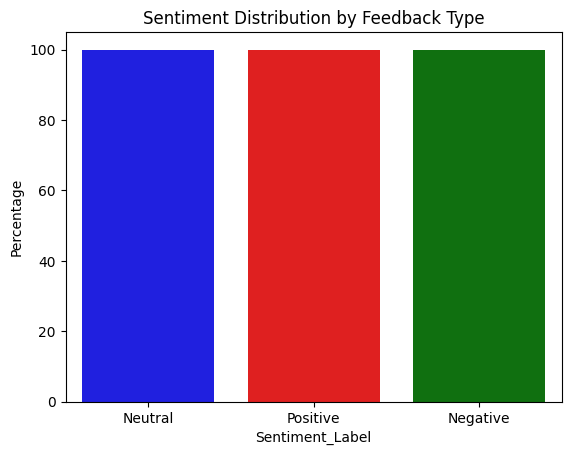

In [9]:
#Sentiment Distribution by Feedback Type
df['Sentiment_Label'].value_counts(normalize=True)
sns.barplot(x=sentiment, y=percentage, palette=['blue','red','green'])
plt.title('Sentiment Distribution by Feedback Type')
plt.xlabel('Sentiment_Label')
plt.ylabel('Percentage')
plt.show()

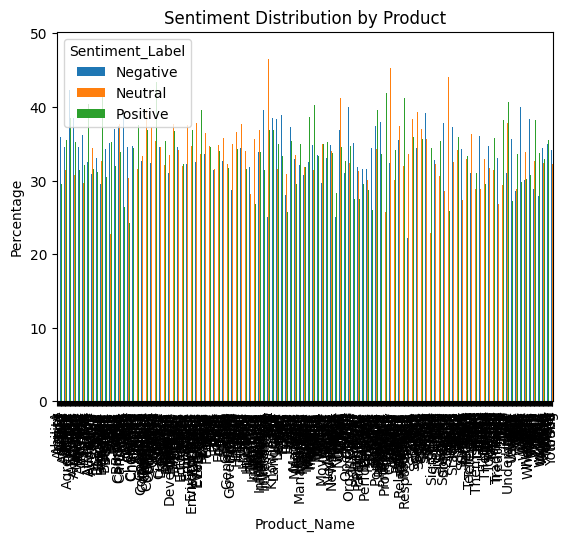

<Figure size 8000x4000 with 0 Axes>

In [10]:
#Sentiment Distribution by Product
product_sentiment.unstack().plot(kind='bar')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product_Name')
plt.ylabel('Percentage')
plt.figure(figsize=(20,10),dpi=400)
plt.show()


Word Cloud for Sentiments

In [12]:
#Word Cloud for Positive Sentiment
from wordcloud import WordCloud

positive_text = feedback[feedback['Sentiment_Label'] > 0]['Comment']
wordcloud = WordCloud(width=800, height=400).generate(' '.join(positive_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

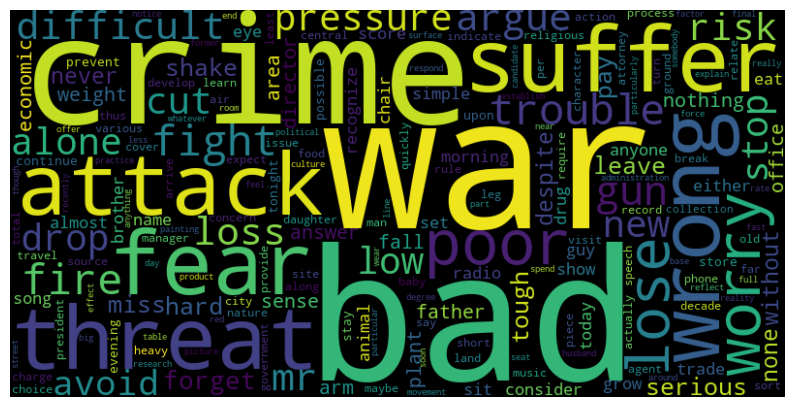

In [ ]:
#Word Cloud for Negative Sentiment

negative_text = feedback[feedback['Sentiment_Label'] < 0]['Comment']
wordcloud = WordCloud(width=800, height=400).generate(' '.join(negative_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


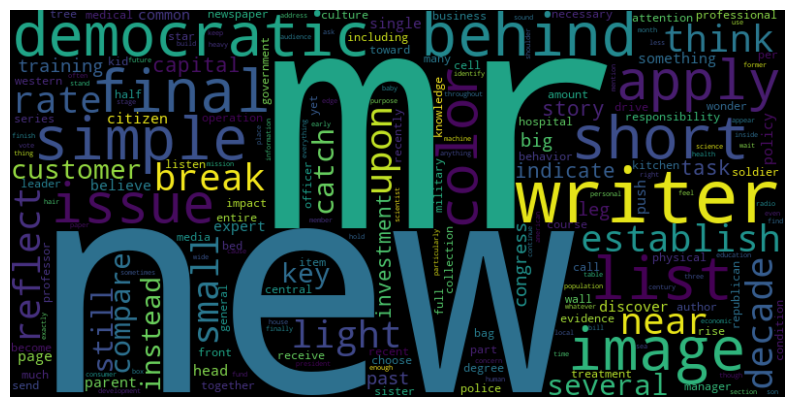

In [ ]:
#Word Cloud for Neutral Sentiment

Neutral_text = feedback[feedback['Sentiment_Label'] == 0]['Comment']
wordcloud = WordCloud(width=800, height=400).generate(' '.join(Neutral_text))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Customer Demographics Impact

Examine how customer demographics (age, gender, location) influence sentiment and feedback.

In [ ]:
df1=Data1.filter(items=["Age","Gender","Location","Sentiment_Label"])
df1

,Age,Gender,Location,Sentiment_Label
0,52,Female,Kennethville,Negative
1,19,Male,Erinfort,Positive
2,37,Female,Galvanville,Neutral
3,37,Female,Galvanville,Positive
4,37,Female,Galvanville,Negative
...,...,...,...,...
99995,43,Male,New Mathewchester,Neutral
99996,43,Male,New Mathewchester,Negative
99997,50,Female,East Georgetown,Negative
99998,50,Female,East Georgetown,Positive


Group by demographic and calculate sentiment counts

In [ ]:
age_sentiment=df1.groupby(["Age","Sentiment_Label"]).size()
gender_sentiment=df1.groupby(["Gender","Sentiment_Label"]).size()
location_sentiment=df1.groupby(["Location","Sentiment_Label"]).size()

Sentiment By Age

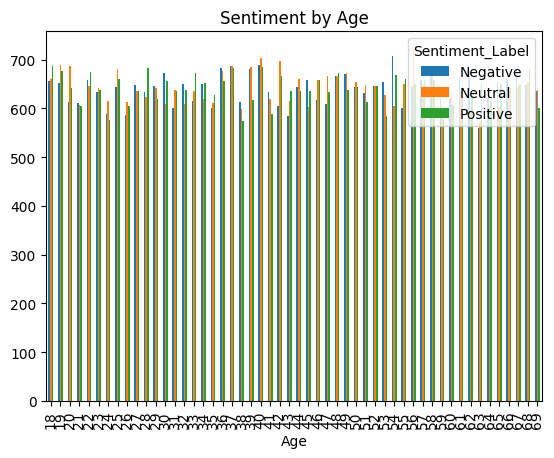

In [ ]:
age_sentiment.unstack().plot(kind="bar")
plt.title("Sentiment by Age")
plt.show()

Sentiment by Gender

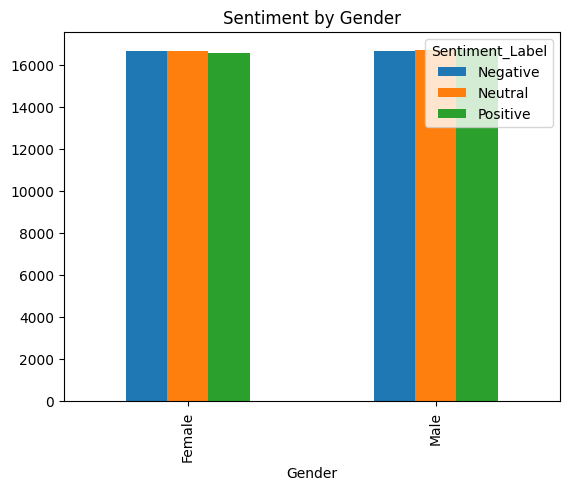

In [ ]:
gender_sentiment.unstack().plot(kind="bar")
plt.title("Sentiment by Gender")
plt.show()

Sentiment by Location

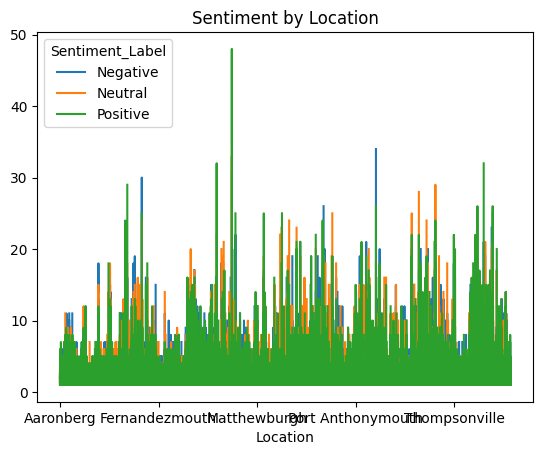

In [ ]:
location_sentiment.unstack().plot(kind="line")
plt.title("Sentiment by Location")
plt.show()